# Preparing a Dataset for Modeling
## 120 Years of Olympic History 

The dataset is from Kaggle: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

### Instructions: 

* Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

I am choosing the outcome variable of Medal = Gold, and also looking at the categorical variables 'sex', 'country' and 'year', and the continuous variables 'age', 'weight' 'height'.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

When you're done, submit a link to your work below.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
df = pd.read_csv('athlete_events.csv')

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


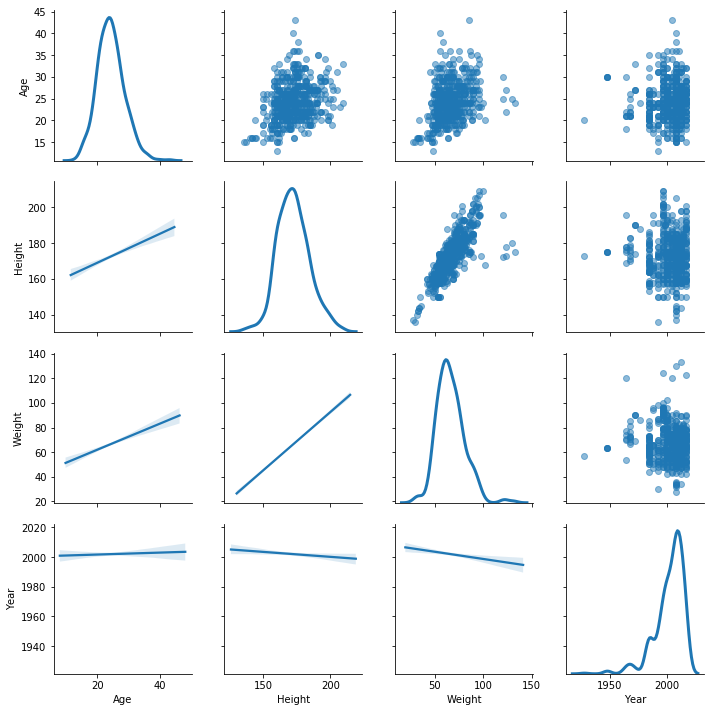

In [59]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.

df['Gender'] = np.where((df['Sex'].isin(['M'])), 1, 0)

#(df['NOC'] == 'CHN') | (df['NOC'] == 'NED')) &

gold_info = df.loc[
    (df['Medal'] == 'Gold'),
    [ 'Team', 'Age', 'Height', 'Weight', 'Year', 'Sport']
]

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(medals_info.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

             Age    Height    Weight      Year
Age     1.000000  0.098969  0.176790 -0.095737
Height  0.098969  1.000000  0.809500  0.034419
Weight  0.176790  0.809500  1.000000  0.004202
Year   -0.095737  0.034419  0.004202  1.000000


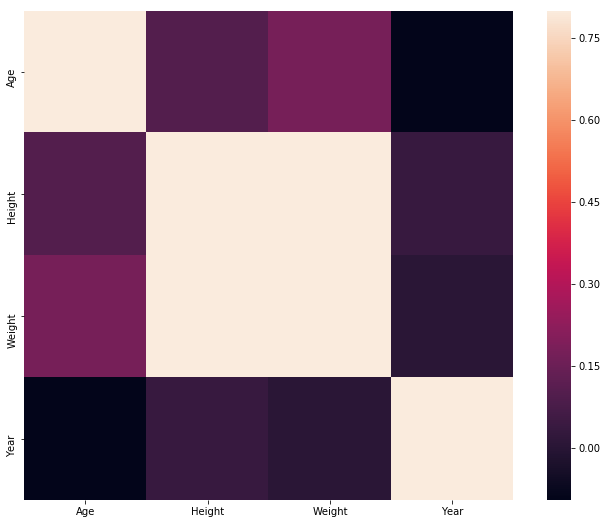

In [60]:
# Make the correlation matrix.
corrmat = gold_info.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


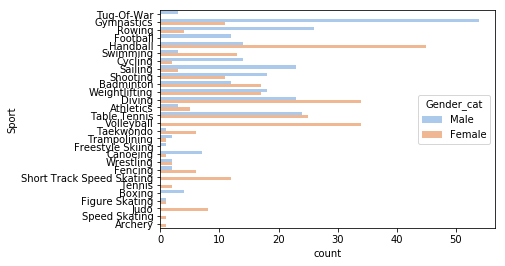

In [71]:

# Add a second categorical variable.
df_2cat = df.loc[
    ((df['NOC'] == 'CHN') | (df['NOC'] == 'DEN')) & (df['Medal'] == 'Gold'),
    ['Sport','Gender']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Gender_cat'] = None
df_2cat.loc[df_2cat['Gender'] == 1, 'Gender_cat'] = 'Male'
df_2cat.loc[df_2cat['Gender'] == 0, 'Gender_cat'] = 'Female'

# Plot counts for each combination of levels.

sns.countplot(y="Sport", hue="Gender_cat", data=df_2cat, palette="pastel")
plt.show()